In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import re

from pathlib import Path

In [2]:
M = 100
lr = 0.1
batch_size = 1024

methods = ["FO", "SO", "exact", "MC", "uniform"]
bound = "seeger"
max_depth = None

datasets = "MNIST PENDIGITS FASHION PROTEIN SENSORLESS SHUTTLE"
datasets = datasets.split(" ")

ns = [60000, 7494, 60000, 17766, 46807, 43500]
dims = [784, 16, 784, 357, 48, 9]

results = {}
for d in datasets:
    
    results[d] = {}
    for m in methods:
        load_dir = Path(f"../results/multic/{d}/{m}/{bound}")
        
        try:
            path = next(load_dir.rglob(f"**/stochastic-bound=False/**/M={M}/**/max-depth={max_depth}/**/err-b.npy"))
            results[d][m] = np.load(path, allow_pickle=True).item()
        except:
            print("Missing", load_dir, M)

Missing ../results/multic/MNIST/FO/seeger 100
Missing ../results/multic/MNIST/SO/seeger 100
Missing ../results/multic/MNIST/exact/seeger 100
Missing ../results/multic/MNIST/MC/seeger 100
Missing ../results/multic/FASHION/FO/seeger 100
Missing ../results/multic/FASHION/SO/seeger 100
Missing ../results/multic/FASHION/exact/seeger 100
Missing ../results/multic/FASHION/MC/seeger 100
Missing ../results/multic/PROTEIN/FO/seeger 100
Missing ../results/multic/PROTEIN/SO/seeger 100
Missing ../results/multic/PROTEIN/exact/seeger 100
Missing ../results/multic/PROTEIN/MC/seeger 100
Missing ../results/multic/SENSORLESS/FO/seeger 100
Missing ../results/multic/SENSORLESS/SO/seeger 100
Missing ../results/multic/SENSORLESS/exact/seeger 100
Missing ../results/multic/SENSORLESS/MC/seeger 100
Missing ../results/multic/SHUTTLE/FO/seeger 100
Missing ../results/multic/SHUTTLE/SO/seeger 100
Missing ../results/multic/SHUTTLE/exact/seeger 100
Missing ../results/multic/SHUTTLE/MC/seeger 100
Missing ../results/mu

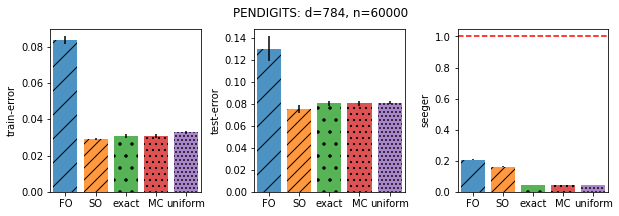

In [5]:
hatches = ["/", "//", ".", "..", "..."]
for d, s, n in zip(datasets, dims, ns):
    
    plt.figure(figsize=(10,3))
    for j, y in enumerate(["train-error", "test-error", bound]):
        ax = plt.subplot(131 + j)

        for i, (m, h) in enumerate(zip(methods, hatches)):

            plt.bar(i, results[d][m][y][0], yerr=results[d][m][y][1], label=m, alpha=0.8, hatch=h)
            plt.ylabel(y)

        if y == bound:
            plt.plot([-0.5, 4.5], [1, 1], linestyle='dashed', c="r")

        ax.set_xticks(range(5))
        ax.set_xticklabels(methods)
        plt.xlim(-0.5, 4.5)
        plt.subplots_adjust(wspace=0.35)
        
    plt.suptitle(f"{d}: d={s}, n={n}")
    plt.savefig(f"{d}.pdf", bbox_inches="tight")

In [6]:
def draw_bars(datasets):
    
    x_pos = np.linspace(0, 0.75*len(methods), len(methods))
    step = len(methods)
    
    plt.figure(figsize=(9, 6))
    b = "seeger"
    
    for i, d in enumerate(datasets):
        ax = plt.subplot(2, 4, i + 1)
        test_errors = ([results[d][m]["test-error"][0] for m in methods], [results[d][m]["test-error"][1] for m in methods])
        bounds = ([results[d][m][b][0] for m in methods], [results[d][m][b][1] for m in methods])

        plt.bar(x_pos, bounds[0], yerr=bounds[1], alpha=0.8, hatch="/", label="bound")
        plt.bar(x_pos, test_errors[0], yerr=test_errors[1], alpha=1, hatch=".", label="test error")

        plt.title(d, fontsize=15)
        plt.ylim(0, 1)
        ax.set_xticklabels(methods, fontsize=12, rotation=70)    
        ax.set_xticks(x_pos)
        
        if i % 4 != 0:
            ax.set_yticks([])
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.subplots_adjust(wspace=0, hspace=0.7)

    plt.savefig(f"mutlic-test.pdf", bbox_inches="tight")

/home/vale/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


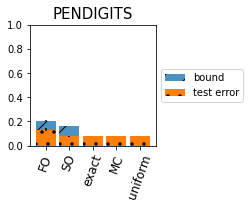

In [7]:
draw_bars(["PENDIGITS"])

In [53]:
bound = "seeger"
depths = list(range(1, 11))

methods = ["FO", "SO", "exact", "MC"]

results = {}
for d in ["PENDIGITS"]:
    
    results[d] = {}
    for m in methods:
        load_dir = Path(f"../results/multic/{d}/{m}/{bound}")
        
        results[d][m] = {}
        for t in depths:
            
            try:
                path = next(load_dir.rglob(f"**/stochastic-bound=False/**/M={M}/**/max-depth={t}/**/err-b.npy"))
                results[d][m][t] = np.load(path, allow_pickle=True).item()
            except:
                print("Missing", load_dir, t)

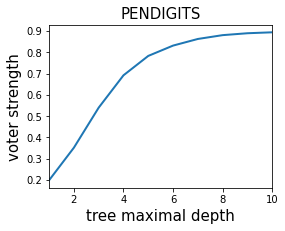

In [60]:
plt.figure(figsize=(4,3))
d = "PENDIGITS"
e = "strength"
strengths = [results[d]["MC"][t][e][0] for t in depths]
    
plt.plot(depths, strengths, linewidth=2)
plt.fill_between(depths, [results[d]["MC"][t][e][0] - results[d]["MC"][t][e][1] for t in depths], [results[d]["MC"][t][e][0] + results[d]["MC"][t][e][1] for t in depths], alpha=0.5)

plt.title(d, fontsize=15)
plt.xlim(1, 10)
plt.xlabel("tree maximal depth", fontsize=15)
plt.ylabel("voter strength", fontsize=15)
    
plt.savefig(f"{d}-strength.pdf", bbox_inches="tight")

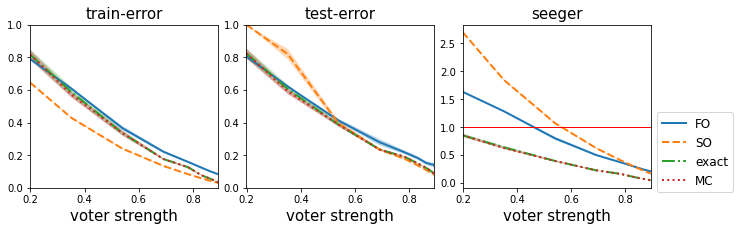

In [64]:
d = "PENDIGITS"

plt.figure(figsize=(15,3))

x_min, x_max = min(strengths), max(strengths)
for j, e in enumerate(["train-error", "test-error", bound]):
    ax = plt.subplot(141 + j)

    for m, s in zip(methods, ["-", "--", "-.", ":"]):
        y = np.array([results[d][m][t][e][0] for t in depths])
        err = np.array([results[d][m][t][e][1] for t in depths])

        plt.plot(strengths, y, label=m, linestyle=s, linewidth=2)
        plt.fill_between(strengths, y-err, y+err, alpha=0.3)
        
        if e == bound:
            plt.plot([x_min, x_max], [1, 1], c="r", linewidth=1)
        else:
            plt.ylim(0, 1)
        plt.xlim(x_min, x_max)
        plt.xlabel("voter strength", fontsize=15)
        plt.title(e, fontsize=15)
        
plt.legend(bbox_to_anchor=(1, 0.5), fontsize=12)   
plt.subplots_adjust(wspace=0.15)
    
plt.savefig(f"{d}-strength-stats.pdf", bbox_inches="tight")

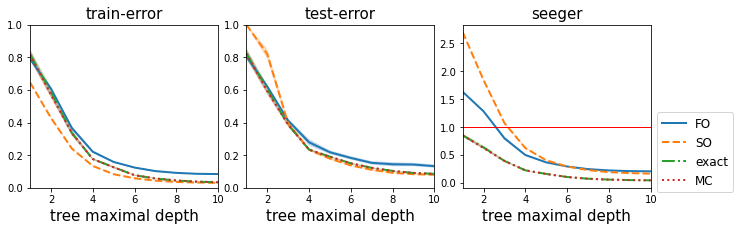

In [63]:
d = "PENDIGITS"

plt.figure(figsize=(15,3))

x_min, x_max = min(depths), max(depths)
for j, e in enumerate(["train-error", "test-error", bound]):
    ax = plt.subplot(141 + j)

    for m, s in zip(methods, ["-", "--", "-.", ":"]):
        y = np.array([results[d][m][t][e][0] for t in depths])
        err = np.array([results[d][m][t][e][1] for t in depths])

        plt.plot(depths, y, label=m, linestyle=s, linewidth=2)
        plt.fill_between(depths, y-err, y+err, alpha=0.3)
        
        if e == bound:
            plt.plot([x_min, x_max], [1, 1], c="r", linewidth=1)
        else:
            plt.ylim(0, 1)
            
#         plt.xscale("exp")
        plt.xlim(x_min, x_max)
        plt.xlabel("tree maximal depth", fontsize=15)
        plt.title(e, fontsize=15)
        
plt.legend(bbox_to_anchor=(1, 0.5), fontsize=12)   
plt.subplots_adjust(wspace=0.15)
    
plt.savefig(f"{d}-depth-stats.pdf", bbox_inches="tight")

In [81]:
methods = ["Adaboost", "BayesianNB"]

results = {}
for d in datasets:
    
    results[d] = {}
    for m in methods:
        load_dir = Path(f"../results/multic/{d}/{m}/M={M}/max-depth=None")
        
        try:
            path = next(load_dir.rglob(f"**/err-b.npy"))
            results[d][m] = np.load(path, allow_pickle=True).item()
        except:
            print("Missing", load_dir, M)

In [82]:
results["PROTEIN"]

{'Adaboost': {'train-error': (0.0, 0.0),
  'test-error': (0.4982782057091074, 0.0022263645699432434)},
 'BayesianNB': {'train-error': (0.30974895, 0.0),
  'test-error': (0.82087296, 0.0)}}